In [1]:
# Imports 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection as sk
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from scipy.stats import skew, skewtest
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale

C:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
import lightgbm as lgb 

In [2]:
def rms(testY,results):
    value = np.sqrt(mean_squared_error(testY,results))
    print ("RMS: " , value)
    return;

In [6]:
data = pd.read_csv("train_final.csv")
data.head()

,Unnamed: 0,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,checkins_x,review_count,...,category,checkins_y,weekday_checkins,weekend_checkins,state,latitude,longitude,lat_long,proximity,proximity_percent
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,6.0,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
1,1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,177.0,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
2,2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,79.0,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
3,3,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,40.0,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
4,4,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,Montréal,4.0,84,119.0,3.0,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92


In [7]:
data.drop(['Unnamed: 0','review_id','user_id','business_id','city','checkins_x','latitude','state','longitude','lat_long'],axis =1, inplace = True)

In [8]:
data.head()

,review_rating,business_rating,business_review_count,review_count,elite,average_stars,Rep,compliments,followers_count,tip_count,category,checkins_y,weekday_checkins,weekend_checkins,proximity,proximity_percent
0,5,4.0,84,6.0,None,4.67,0.0,0.0,0.0,0.0,Food,119,80,39,7582,92
1,5,4.0,84,177.0,"2015, 2017, 2016",3.41,53.0,69.0,234.0,1.0,Food,119,80,39,7582,92
2,5,4.0,84,79.0,"2013, 2014",4.52,1.0,156.0,84.0,0.0,Food,119,80,39,7582,92
3,5,4.0,84,40.0,None,3.98,1.0,8.0,92.0,0.0,Food,119,80,39,7582,92
4,4,4.0,84,3.0,None,4.00,0.0,0.0,0.0,0.0,Food,119,80,39,7582,92


In [9]:
data[['elite']] = data[['elite']].astype(str)
for index, row in data.iterrows():
    if row['elite'] == 'None':
        data.set_value(index,'elite',0)
    else:
        data.set_value(index,'elite',row['elite'].count(',')+1)
        
data.head()

C:\Anaconda\envs\python2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Anaconda\envs\python2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,review_rating,business_rating,business_review_count,review_count,elite,average_stars,Rep,compliments,followers_count,tip_count,category,checkins_y,weekday_checkins,weekend_checkins,proximity,proximity_percent
0,5,4.0,84,6.0,0,4.67,0.0,0.0,0.0,0.0,Food,119,80,39,7582,92
1,5,4.0,84,177.0,3,3.41,53.0,69.0,234.0,1.0,Food,119,80,39,7582,92
2,5,4.0,84,79.0,2,4.52,1.0,156.0,84.0,0.0,Food,119,80,39,7582,92
3,5,4.0,84,40.0,0,3.98,1.0,8.0,92.0,0.0,Food,119,80,39,7582,92
4,4,4.0,84,3.0,0,4.00,0.0,0.0,0.0,0.0,Food,119,80,39,7582,92


In [10]:
data[['elite']] = data[['elite']].apply(pd.to_numeric)
data = data.rename(index=str, columns={"review_count": "user_review_count", "average_stars": "user_average_stars","checkins_y":"checkins"})

In [11]:
data.dtypes

review_rating              int64
business_rating          float64
business_review_count      int64
user_review_count        float64
elite                      int64
user_average_stars       float64
Rep                      float64
compliments              float64
followers_count          float64
tip_count                float64
category                  object
checkins                   int64
weekday_checkins           int64
weekend_checkins           int64
proximity                  int64
proximity_percent          int64
dtype: object

In [13]:
data = pd.get_dummies(data)

In [14]:
data.head()

,review_rating,business_rating,business_review_count,user_review_count,elite,user_average_stars,Rep,compliments,followers_count,tip_count,...,category_Local Flavor,category_Local Services,category_Mass Media,category_Nightlife,category_Pets,category_Professional Services,category_Public Services & Government,category_Religious Organizations,category_Restaurants,category_Shopping
0,5,4.0,84,6.0,0,4.67,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,5,4.0,84,177.0,3,3.41,53.0,69.0,234.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,5,4.0,84,79.0,2,4.52,1.0,156.0,84.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,5,4.0,84,40.0,0,3.98,1.0,8.0,92.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,4.0,84,3.0,0,4.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


         review_rating  business_rating  business_review_count  elite  \
0                    5              4.0                     84      0   
1                    5              4.0                     84      3   
2                    5              4.0                     84      2   
3                    5              4.0                     84      0   
4                    4              4.0                     84      0   
5                    5              4.0                     84      0   
6                    1              4.0                     84      0   
7                    5              4.0                     84      0   
8                    3              4.0                     84      2   
9                    5              4.0                     84      0   
10                   5              4.0                     84      0   
11                   5              4.0                     84      3   
12                   3              4.0            

In [23]:
data.fillna(0,inplace = True)

In [24]:
data.to_csv('TrainingDataSet.csv')

In [2]:
data = pd.read_csv('TrainingDataSet.csv')
data.drop(['Unnamed: 0'],axis=1,inplace = True)

In [3]:
data.head()

,review_rating,business_rating,business_review_count,user_review_count,elite,user_average_stars,Rep,compliments,followers_count,tip_count,...,category_Local Flavor,category_Local Services,category_Mass Media,category_Nightlife,category_Pets,category_Professional Services,category_Public Services & Government,category_Religious Organizations,category_Restaurants,category_Shopping
0,5,4.0,84,6.0,0,4.67,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,5,4.0,84,177.0,3,3.41,53.0,69.0,234.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,5,4.0,84,79.0,2,4.52,1.0,156.0,84.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,5,4.0,84,40.0,0,3.98,1.0,8.0,92.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,4.0,84,3.0,0,4.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.drop(list(data.filter(regex = 'category')), axis = 1, inplace = True)

In [5]:
data.head()

,review_rating,business_rating,business_review_count,user_review_count,elite,user_average_stars,Rep,compliments,followers_count,tip_count,checkins,weekday_checkins,weekend_checkins,proximity,proximity_percent
0,5,4.0,84,6.0,0,4.67,0.0,0.0,0.0,0.0,119,80,39,7582,92
1,5,4.0,84,177.0,3,3.41,53.0,69.0,234.0,1.0,119,80,39,7582,92
2,5,4.0,84,79.0,2,4.52,1.0,156.0,84.0,0.0,119,80,39,7582,92
3,5,4.0,84,40.0,0,3.98,1.0,8.0,92.0,0.0,119,80,39,7582,92
4,4,4.0,84,3.0,0,4.00,0.0,0.0,0.0,0.0,119,80,39,7582,92


In [6]:
data['review_rating'] = data['review_rating'] <= 3

In [7]:
data.head()

,review_rating,business_rating,business_review_count,user_review_count,elite,user_average_stars,Rep,compliments,followers_count,tip_count,checkins,weekday_checkins,weekend_checkins,proximity,proximity_percent
0,False,4.0,84,6.0,0,4.67,0.0,0.0,0.0,0.0,119,80,39,7582,92
1,False,4.0,84,177.0,3,3.41,53.0,69.0,234.0,1.0,119,80,39,7582,92
2,False,4.0,84,79.0,2,4.52,1.0,156.0,84.0,0.0,119,80,39,7582,92
3,False,4.0,84,40.0,0,3.98,1.0,8.0,92.0,0.0,119,80,39,7582,92
4,False,4.0,84,3.0,0,4.00,0.0,0.0,0.0,0.0,119,80,39,7582,92


In [8]:
data[['review_rating']] = data[['review_rating']].apply(pd.to_numeric).astype('bool') 

In [13]:
data['review_rating'] = data['review_rating'].astype('int') 

In [14]:
data.head()

,review_rating,business_rating,business_review_count,user_review_count,elite,user_average_stars,Rep,compliments,followers_count,tip_count,checkins,weekday_checkins,weekend_checkins,proximity,proximity_percent
0,0,4.0,84,6.0,0,4.67,0.0,0.0,0.0,0.0,119,80,39,7582,92
1,0,4.0,84,177.0,3,3.41,53.0,69.0,234.0,1.0,119,80,39,7582,92
2,0,4.0,84,79.0,2,4.52,1.0,156.0,84.0,0.0,119,80,39,7582,92
3,0,4.0,84,40.0,0,3.98,1.0,8.0,92.0,0.0,119,80,39,7582,92
4,0,4.0,84,3.0,0,4.00,0.0,0.0,0.0,0.0,119,80,39,7582,92


In [15]:
data.to_csv('AUC_data.csv')

In [4]:
data['review_rating'] = data['review_rating'] - 1
data.head()

,review_rating,business_rating,business_review_count,user_review_count,elite,user_average_stars,Rep,compliments,followers_count,tip_count,...,category_Local Flavor,category_Local Services,category_Mass Media,category_Nightlife,category_Pets,category_Professional Services,category_Public Services & Government,category_Religious Organizations,category_Restaurants,category_Shopping
0,4,4.0,84,6.0,0,4.67,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,4,4.0,84,177.0,3,3.41,53.0,69.0,234.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,4,4.0,84,79.0,2,4.52,1.0,156.0,84.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,4.0,84,40.0,0,3.98,1.0,8.0,92.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,3,4.0,84,3.0,0,4.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.dtypes

review_rating               bool
business_rating          float64
business_review_count      int64
user_review_count        float64
elite                      int64
user_average_stars       float64
Rep                      float64
compliments              float64
followers_count          float64
tip_count                float64
checkins                   int64
weekday_checkins           int64
weekend_checkins           int64
proximity                  int64
proximity_percent          int64
dtype: object

In [5]:
X = data.drop(['review_rating'],axis =1)
y = data['review_rating']

In [6]:
trainX, testX, trainY, testY = sk.train_test_split(X,y,train_size = .8, random_state = 12)

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
model = LinearRegression()
model.fit(trainX,trainY)
rms(testY,model.predict(testX))

NameError: name 'rms' is not defined

In [22]:
model = RidgeCV()
model.fit((trainX),(trainY))
rms((testY),model.predict(testX))

RMS:  1.12289833729


RMS:  1.17502269816
Number of Non-Zero Coefficients:  10


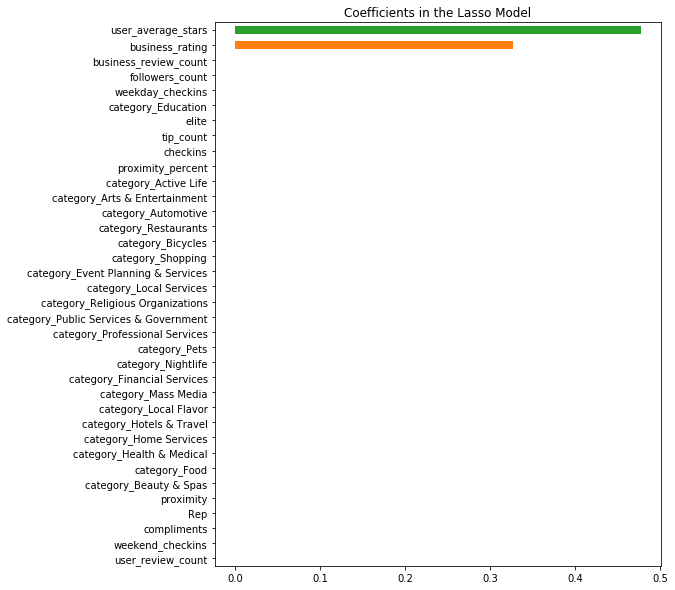

In [23]:
model = LassoCV()
model.fit(trainX,trainY)
rms(np.ravel(testY),np.ravel(model.predict(testX)))
coef = model.coef_
count = 0
for num in coef:
    if num != 0:
        count += 1

print ("Number of Non-Zero Coefficients: ",count)


coef = pd.Series(model.coef_, index = trainX.columns)
imp_coef = pd.concat([coef.sort_values()])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [24]:
d_train = lgb.Dataset(trainX, label=trainY)

In [25]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['metric'] = 'multi_logloss'
params['num_class'] = 5
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [26]:
clf = lgb.train(params, d_train, 100)

KeyboardInterrupt: 

In [7]:
boost = xgb.XGBClassifier(n_estimators=250, nthreads = 12, n_jobs = 12, objective = "multi:softmax", num_class = 5)

In [11]:
boost.fit(trainX,trainY)
print ("Inital XGBoost: ")
#print 1-boost.predict_proba(testX)[:,0]
rms(np.ravel(testY),np.ravel(boost.predict(testX)))

Inital XGBoost: 
RMS:  1.34212462782


In [8]:
#do some cross validation to find number of estimators
xgb_param = boost.get_xgb_params()
xgb_param['num_class'] = 5
xgb_param['num_jobs'] = 12
print(xgb_param)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 250, 'nthread': 12, 'objective': 'multi:softmax', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'silent': 1, 'subsample': 1, 'nthreads': 12, 'num_class': 5, 'num_jobs': 12}


In [9]:
xgtrain = xgb.DMatrix(trainX.values, label=trainY.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=boost.get_params()['n_estimators'], nfold=5,
             early_stopping_rounds=50)
boost.set_params(n_estimators=cvresult.shape[0])
print( 'Number of estimators to set: ' , cvresult.shape[0])

boost.fit(trainX, trainY)
rms(np.ravel(testY),np.ravel(boost.predict(testX)))

KeyboardInterrupt: 

In [ ]:
#Coarsely tune max_depth and min_child_weight
param_test1 = {
 'max_depth':range(1,15,1),
 'min_child_weight':range(1,10,1)
}
gsearch1 = GridSearchCV(
    estimator = boost, 
    param_grid = param_test1, 
    scoring='neg_mean_squared_error',
    n_jobs=12,
    iid=False, 
    cv=5)
gsearch1.fit(trainX,trainY)
print (gsearch1.best_params_)

In [ ]:
#Now Finely tune
param_test2 = {
 'max_depth':[5,6,7,8],
 'min_child_weight':[4.1,4.2,4.3,4.4,4.5,4.6,4.7,5,5.2,5.5,5.6,5.8,6]
}
gsearch2 = GridSearchCV(
    estimator = boost, 
    param_grid = param_test2, 
    scoring='neg_mean_squared_error',
    n_jobs=4,
    iid=False, 
    cv=5)
gsearch2.fit(trainX,trainY)
print (gsearch2.best_params_)

In [ ]:
#Setting min_child_weight and max_depth
boost.set_params(max_depth=8)
boost.set_params(min_child_weight= 4.5)

boost.fit(trainX, trainY)
rms(np.ravel(testY),np.ravel(boost.predict(testX)))

In [ ]:
#Optimize gamma with grid search
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(
    estimator =boost, 
    param_grid = param_test3, 
    scoring='neg_mean_squared_error',
    n_jobs=4,
    iid=False, 
    cv=5)
gsearch3.fit(trainX, trainY)
print (gsearch3.best_params_)

In [ ]:
boost.set_params(gamma = 0.2)
#Recalibrate
xgb_param = boost.get_xgb_params()
xgtrain = xgb.DMatrix(trainX.values, label=trainY.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=boost.get_params()['n_estimators'], nfold=5,
            metrics='rmse', early_stopping_rounds=50)
boost.set_params(n_estimators=cvresult.shape[0])
print('Number of estimators to set: ' + str(cvresult.shape[0]))

boost.fit(trainX, trainY)
rms(np.ravel(testY),np.ravel(boost.predict(testX)))

In [15]:
#Tuning subsample and colsample_bytree#Tuning  
param_test4 = {
    'subsample':[i/10.0 for i in range(3,10)],
    'colsample_bytree':[i/10.0 for i in range(3,10)]
}
gsearch4 = GridSearchCV(
    estimator =boost, 
    param_grid = param_test4, 
    scoring='neg_mean_squared_error',
    n_jobs=4,
    iid=False, 
    cv=5)
gsearch4.fit(trainX, trainY)
print (gsearch4.best_params_)

NameError: name 'boost' is not defined

In [ ]:
#fine tuning
param_test5 = {
 'subsample':[i/100.0 for i in range(80,100,2)],
 'colsample_bytree':[i/100.0 for i in range(30,50,2)]
}
gsearch5 = GridSearchCV(
    estimator = boost, 
    param_grid = param_test5, 
    scoring='neg_mean_squared_error',
    n_jobs=4,
    iid=False, 
    cv=5)
gsearch5.fit(trainX,trainY)
print(gsearch5.best_params_)

In [ ]:
boost.set_params(colsample_bytree=0.38)
boost.set_params(subsample=0.86)

boost.fit(trainX, trainY)
rms(np.ravel(testY),np.ravel(boost.predict(testX)))

In [ ]:
#course tuning
param_test6 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(
    estimator = boost, 
    param_grid = param_test6, 
    scoring='neg_mean_squared_error',
    n_jobs=4,
    iid=False, 
    cv=5)

gsearch6.fit(trainX,trainY)
print (gsearch6.best_params_)

In [ ]:
#fine tuning
param_test7 = {
    'reg_alpha':[1e-6,5e-6,1e-5,5e-5,1e-4],
    'reg_lambda':[.1,.3,.5,.7,1,3,5,7,9,10]
}
gsearch7 = GridSearchCV(
    estimator = boost, 
    param_grid = param_test7, 
    scoring='neg_mean_squared_error',
    n_jobs=4,
    iid=False, 
    cv=5)
gsearch7.fit(trainX,trainY)
print (gsearch7.best_params_)

In [ ]:
boost.set_params(reg_alpha=.0001)
boost.set_params(reg_lambda=.5)

In [ ]:
xgb_param = boost.get_xgb_params()
xgtrain = xgb.DMatrix(trainX.values, label=trainY.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=boost.get_params()['n_estimators'], nfold=5,
            metrics='rmse', early_stopping_rounds=500)
boost.set_params(n_estimators=cvresult.shape[0])
boost.fit(trainX, trainY)

print ('Final XGBoost: ')
rms(testY,boost.predict(testX))